# DSCI100 Project: Predicting Usage of a Minecraft Server

## Introduction

The Pacific Laboratory for Artificial Intelligence (PLAI) is currently running a Minecraft server and collecting data on their actions. Such data can be used to determine the quantity and allocation of resources and efforts. This report seeks to answer the question: Can a user's played hours and age predict subscription to a game-related newsletter in the collected Minecraft player data? This will be done using a kknn classification model.

The player data recieved contains 196 observations and 7 variables:
 
* experience: character vector describing the adeptness of a player
* subscribe: logical vector if the player is subscribed to a related game newsletter
* hashedEmail: character vector corresponding to a unique individual's email
* played_hours: double precision numerical vector of hours a player has spent on the server
* name: character vector of a player's name
* gender: character vector of a player's gender
* Age: double precision numerical vector of a player's age

There are a few issues that arise especially when building a kknn model, such as the presence of NAs. The model will require numerical distances to calculate nearest neighbours; NA rows must be removed. Additionally, many of the player hours are equal to zero, which is not representative of the users actively involved in the server. Finally, the variable experience could be made into a factor as it contains a select type of strings, although it will not be used in the model. Relevant issues will be addressed in the wrangling of data.

## Methods

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


subscribe,played_hours,Age
<lgl>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
TRUE,0.7,21
⋮,⋮,⋮
TRUE,0.1,44
FALSE,0.3,22
FALSE,2.3,17


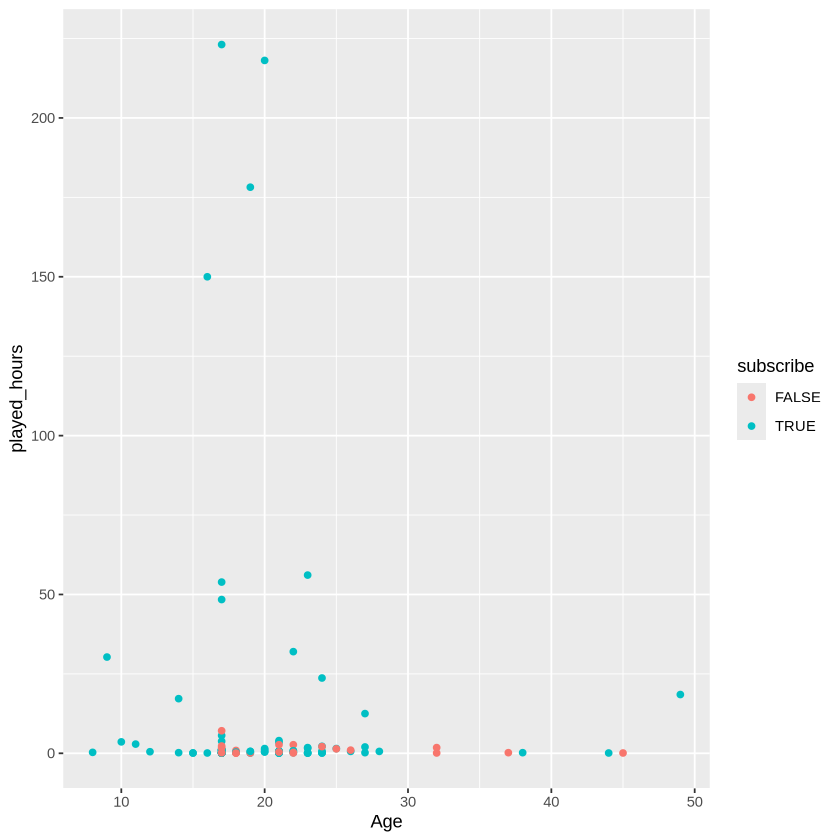

In [17]:
players_tidy <- players |>
    select(subscribe, played_hours, Age) |>
    filter(Age != "NA", played_hours > 0)

players_tidy

playerplot <- players_tidy |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point()

playerplot